In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [ ]:
result7 = pd.read_excel('Submission 7 Check.xlsx', index_col=0)
result13 = pd.read_excel('Submission 13 Check.xlsx', index_col=0)

In [ ]:
result7.head()

,id,ExpID,PatternID,DeviceID,LineNo_ATT,DesRoll,Roll,DesPitch,Pitch,DesYaw,...,MagX,MagY,MagZ,MagZ_2,C1,C2,C3,Lat,Lng,Test/Train
0,0,6,2,F450,14206,-2.52,-0.74,-2.30,-1.55,359.96,...,382,-12,-200,-275,1536,1578,1719,-6.557158,106.733964,Train
1,1,6,2,F450,14216,-2.64,0.28,-2.95,-1.02,359.96,...,385,4,-193,-277,1581,1553,1697,-6.557158,106.733964,Train
2,2,6,2,F450,14226,-2.80,-0.42,-3.46,-1.85,359.96,...,387,12,-196,-278,1601,1540,1690,-6.557159,106.733964,Train
3,3,6,2,F450,14236,-2.63,-1.31,-3.70,-3.97,359.96,...,373,27,-207,-290,1604,1529,1712,-6.557159,106.733964,Train
4,4,6,2,F450,14246,-2.38,-0.74,-2.95,-4.04,359.96,...,370,41,-215,-296,1594,1520,1682,-6.557159,106.733964,Train


In [ ]:
result7.columns

Index(['id', 'ExpID', 'PatternID', 'DeviceID', 'LineNo_ATT', 'DesRoll', 'Roll',
       'DesPitch', 'Pitch', 'DesYaw', 'Yaw', 'ErrRP', 'ErrYaw', 'ThI', 'ABst',
       'ThH', 'DAlt', 'TAlt', 'DCRt', 'CRt', 'VDop', 'HAcc', 'VAcc', 'SAcc',
       'Delta', 'Status', 'GMS', 'NSats', 'Alt.1', 'Spd', 'GCrs', 'GyrX',
       'GyrY', 'GyrZ', 'AccX', 'AccY', 'AccZ', 'AccZ_2', 'MagX', 'MagY',
       'MagZ', 'MagZ_2', 'C1', 'C2', 'C3', 'Lat', 'Lng', 'Test/Train'],
      dtype='object')

# Smoothing

In [ ]:
results = result7[::]
results2 = result13[::]

In [ ]:
import csaps

In [ ]:
def smoothing(x, y, smooth_coef=10**-6):
    cs = csaps.UnivariateCubicSmoothingSpline(x, y, smooth=smooth_coef)
    ynew=cs(x)
    print (max(abs(y-ynew)))
    return ynew

In [ ]:
index1 = result7['ExpID'] == 1
x1 = result7['LineNo_ATT'][index1]
y1 = result7['Lat'][index1]
z1 = result7['Lng'][index1]
ynew1=smoothing(x1, y1)
znew1=smoothing(x1, z1)

9.564421165553227e-05
8.24551447635713e-05


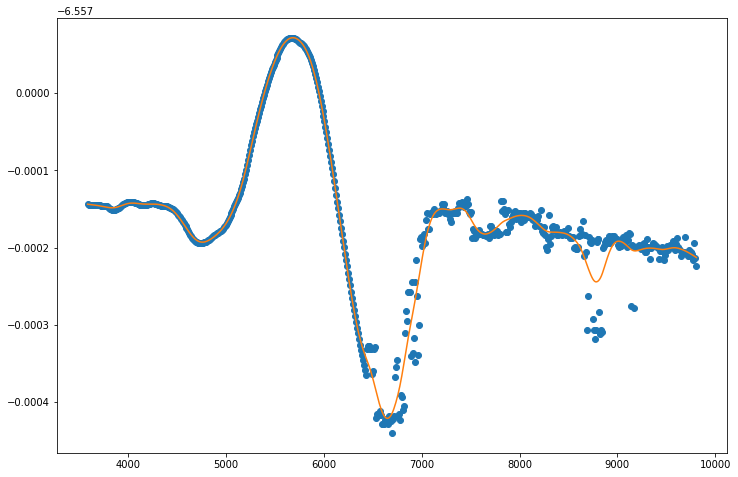

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(x1,y1,'o',x1,ynew1,'-')

In [ ]:
for i in range(1,13):
    index = result7['ExpID'] == i
    results['Lat'][index] = smoothing(result7['LineNo_ATT'][index],result7['Lat'][index])
    results['Lng'][index] = smoothing(result7['LineNo_ATT'][index],result7['Lng'][index])

9.564421165553227e-05
8.24551447635713e-05
2.7192616664173386e-05
9.253098704675722e-05
5.18839325280851e-05
7.68107916826466e-05
1.4594550188817834e-05
1.0112374695836479e-05
4.123563217994786e-06
4.615182049860778e-06
0.0001346349231852173
0.00014807040952291572
9.305012895399756e-05
4.6673541731934165e-05
0.00011118572794632797
9.812985253176976e-05
0.00012273030861997825
4.954093751052824e-05


C:\Users\valen\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\valen\Anaconda2\envs\py35\lib\site-packages\pandas\core\generic.py:9116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\valen\Anaconda2\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

1.5909711251538283e-05
1.2329805286981355e-05
0.00012669364339679134
5.0747835089737237e-05
9.637971426190717e-05
9.254687506654591e-05


In [ ]:
results_test = results[results['Test/Train'] == 'Test']

In [ ]:
results_train = result7[result7['Test/Train'] == 'Train']

In [ ]:
output1 = pd.concat([results_train, results_test], axis=0)

In [ ]:
output1.to_excel('Smoothed_Score_Result7.xlsx')

In [ ]:
results_test

,id,ExpID,PatternID,DeviceID,LineNo_ATT,DesRoll,Roll,DesPitch,Pitch,DesYaw,...,MagX,MagY,MagZ,MagZ_2,C1,C2,C3,Lat,Lng,Test/Train
0,516,6,2,F450,19366,-1.07,-1.63,-9.88,-7.82,7.46,...,360,-31,-237,-327,1555,1683,1717,-6.557360,106.734191,Test
1,517,6,2,F450,19376,-1.18,-6.20,-8.39,-7.27,5.92,...,354,0,-229,-315,1509,1596,1661,-6.557355,106.734186,Test
2,518,6,2,F450,19386,1.10,-5.01,-5.59,-5.89,4.33,...,354,-3,-231,-315,1472,1543,1647,-6.557350,106.734182,Test
3,519,6,2,F450,19396,3.58,-1.88,-2.96,-3.53,3.44,...,356,-15,-216,-299,1427,1582,1657,-6.557344,106.734178,Test
4,520,6,2,F450,19406,4.35,2.57,-0.55,-0.23,3.12,...,379,-38,-197,-272,1432,1528,1619,-6.557339,106.734175,Test
5,521,6,2,F450,19416,3.12,3.34,1.58,2.15,3.04,...,386,-53,-172,-257,1475,1518,1626,-6.557333,106.734173,Test
6,522,6,2,F450,19426,0.69,0.59,3.54,3.92,3.01,...,393,-46,-160,-247,1489,1592,1679,-6.557327,106.734171,Test
7,523,6,2,F450,19436,-0.91,-1.64,3.61,4.31,3.01,...,410,-29,-156,-233,1487,1572,1646,-6.557320,106.734170,Test
8,524,6,2,F450,19446,-2.07,-1.65,0.43,-0.19,3.01,...,395,-16,-165,-264,1512,1574,1664,-6.557314,106.734170,Test
9,525,6,2,F450,19456,-3.19,-2.70,-2.49,-5.45,3.01,...,376,-17,-205,-312,1566,1566,1690,-6.557307,106.734171,Test


In [ ]:
submission = results_test[['id','Lng','Lat']]

In [ ]:
submission.to_csv('Submission14_Smoothed_HistGradientBoosting.csv', index=False)